# **Job Market Analysis and Recommendation System**

---



Objective

The primary objective of this project is to analyze job market trends and build a recommendation
system for job seekers based on real-time data. The system will help in identifying high-demand
job roles, salary trends, and emerging job categories, and will provide personalized job
recommendations.

**Situational Overview**

The job market is dynamic and influenced by various factors including technological
advancements, economic shifts, and cultural trends. This project aims to harness the power of
data analytics to understand these dynamics and provide actionable insights through a
recommendation system. By analyzing historical and current job postings data, the project will
provide predictions and recommendations that help job seekers and recruiters make informed
decisions.bold text

**Importing libries**

In [1]:
# python  import libraries
import numpy as np
import pandas as pd
import os
import re
import random

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Visulization libries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Nltk  librires
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer




# Loading the daatset

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df = pd.read_csv("all_upwork_jobs_2024-02-07-2024-03-24.csv")
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [4]:
df.head(5)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


# data preprocessing

In [5]:
df.tail(5)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France
244827,Creating a UGC Ad for Our Mobile Game,https://www.upwork.com/jobs/Creating-UGC-for-O...,2024-03-24 13:53:00+00:00,False,NaN,NaN,50.0,Israel


In [6]:
df.shape

(244828, 8)

In [7]:
df.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
244823    False
244824    False
244825    False
244826    False
244827    False
Length: 244828, dtype: bool

In [10]:
# basic stats
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,244827,205470,Social Media Manager,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
link,244827,244827,https://www.upwork.com/jobs/Experienced-Media-...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_date,244828,233640,2024-02-24 13:04:28+00:00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_hourly,244828,2,True,140937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hourly_low,102422.0,NaN,NaN,NaN,17.339644,18.140065,3.0,8.0,15.0,20.0,998.0
hourly_high,98775.0,NaN,NaN,NaN,41.97061,47.850892,3.0,20.0,30.0,50.0,999.0
budget,103891.0,NaN,NaN,NaN,911.473564,15729.738834,5.0,25.0,100.0,300.0,1000000.0
country,239751,212,United States,99834,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

# Handle missisng value

In [12]:
# Drop duplicate
df.drop_duplicates(inplace=True)

In [13]:
#Fill missing text field unknown
text_cols = df.select_dtypes(include=['object']).columns
df[text_cols] = df[text_cols].fillna("Unknown")

In [14]:
# fill missing Nans with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [15]:
# checking  missing value after filling value
df.isnull().sum()

title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64

In [16]:
# Convert posted_date to datetime
if 'posted_date' in df.columns:
    df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

# Feature engeenring (Basic cleaning)

# Job Title Keywords (for correlation with salary):

# feature selection

In [17]:
df.shape

(244828, 8)

In [18]:
# Hourly rate (average of low & high)
if "hourly_low" in df.columns and "hourly_high" in df.columns:
    df['hourly_rate'] = (df['hourly_low'] + df['hourly_high']) / 2

In [19]:

# fallback for budget jobs
if "budget" in df.columns:
    df['hourly_rate'] = df['hourly_rate'].fillna(df['budget'])


In [20]:

# Clean job title
df['title_clean'] = df['title'].astype(str).str.lower().str.replace(r'[^a-z ]', '', regex=True)

In [21]:
# Flags for senior/junior
df['has_senior'] = df['title_clean'].str.contains("senior|lead|principal", na=False).astype(int)
df['has_junior'] = df['title_clean'].str.contains("junior|assistant|entry", na=False).astype(int)


In [22]:
# Time features
if "published_date" in df.columns:
    df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
    df['year'] = df['published_date'].dt.year
    df['month'] = df['published_date'].dt.month
    df['dayofweek'] = df['published_date'].dt.dayofweek


In [23]:
# Remote feature
if "job_type" in df.columns:
    df['is_remote'] = df['job_type'].str.contains("remote", case=False, na=False).astype(int)


In [24]:
# salary band
if "hourly_rate" in df.columns:
    df['salary_band'] = pd.cut(df['hourly_rate'],
                               bins=[0, 20, 50, df['hourly_rate'].max()],
                               labels=["Low", "Mid", "High"])


In [25]:
#if 'country' in df.columns:
#    df['country_encoded'] = df['country'].astype('category').cat.codes


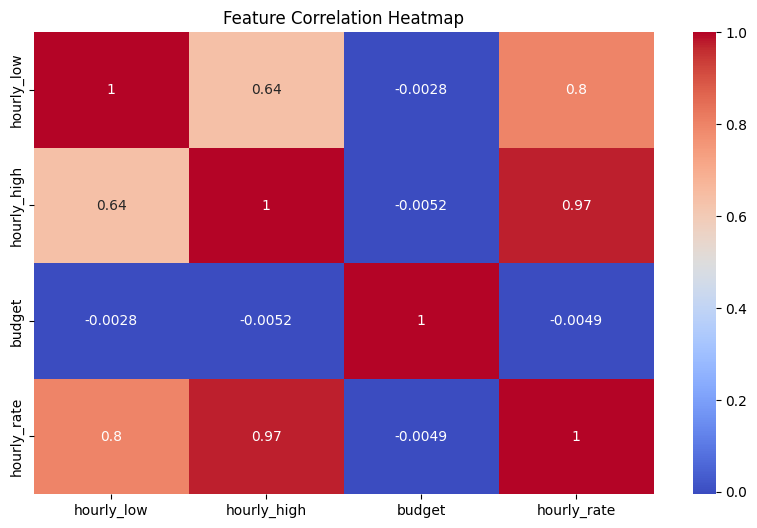

In [26]:
 # Step 4: Feature Selection
# =====================
# Correlation heatmap for numerical features
corr = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
# Encode countries
#if 'country' in df.columns:
#    df['country_encoded'] = df['country'].astype('category').cat.codes


In [28]:
df.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'hourly_rate', 'title_clean',
       'has_senior', 'has_junior', 'year', 'month', 'dayofweek',
       'salary_band'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder

# Step 4: Encoding Categorical Features
# Label encode salary_band
if "salary_band" in df.columns:
    if df['salary_band'].dtype == 'category':
        le = LabelEncoder()
        df['salary_band_encoded'] = le.fit_transform(df['salary_band'])
        print("Label encoded 'salary_band'.")
    else:
        print("'salary_band' column does not appear to be a categorical column needing label encoding.")


# One-hot encode country (if exists)
if "country" in df.columns:
    if df['country'].dtype == 'object':
        df = pd.get_dummies(df, columns=['country'], drop_first=True)
        print("One-hot encoded 'country'.")
    else:
         print("'country' column does not appear to be an object column needing one-hot encoding.")

else:
    print("'country' column not found. Assuming it has already been processed or does not exist.")

Label encoded 'salary_band'.
One-hot encoded 'country'.


In [30]:
# Step 5: Scaling
scaler = StandardScaler()
if "hourly_rate" in df.columns:
    df['hourly_rate_scaled'] = scaler.fit_transform(df[['hourly_rate']])

In [31]:
# Step 6: Train-Test Split
drop_cols = ['title','link','published_date','title_clean','salary_band']
X = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df['hourly_rate']   # target = salary

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (195862, 224)
Test shape: (48966, 224)


# Task 1: Analyze the correlation between job title keywords and offered salaries

In [32]:
# Example keywords to analyze
keywords = ['developer', 'engineer', 'manager', 'analyst', 'designer', 'consultant', 'intern']

# Create new columns for each keyword
for kw in keywords:
    df[f'has_{kw}'] = df['title_clean'].str.contains(kw, case=False, na=False).astype(int)

# Quick check
df[['title_clean'] + [f'has_{kw}' for kw in keywords]].head()


,title_clean,has_developer,has_engineer,has_manager,has_analyst,has_designer,has_consultant,has_intern
0,experienced media buyer for solar pannel and r...,0,0,0,0,0,0,0
1,full stack developer,1,0,0,0,0,0,0
2,smma bubble app,0,0,0,0,0,0,0
3,talent hunter specialized in marketing,0,0,0,0,0,0,0
4,data engineer,0,1,0,0,0,0,0


**Correlation Analysis**

In [33]:
# Correlation with numeric salary
keyword_cols = [f'has_{kw}' for kw in keywords]
corr = df[keyword_cols + ['hourly_rate', 'salary_band_encoded']].corr()

# Display correlation of keywords with hourly_rate
print("Correlation with hourly_rate:")
print(corr['hourly_rate'].sort_values(ascending=False))


Correlation with hourly_rate:
hourly_rate            1.000000
has_consultant         0.055416
has_engineer           0.033535
has_analyst            0.015905
has_intern             0.008667
has_developer          0.006518
has_designer          -0.006602
has_manager           -0.020703
salary_band_encoded   -0.328289
Name: hourly_rate, dtype: float64


**salary distribution by keyword**

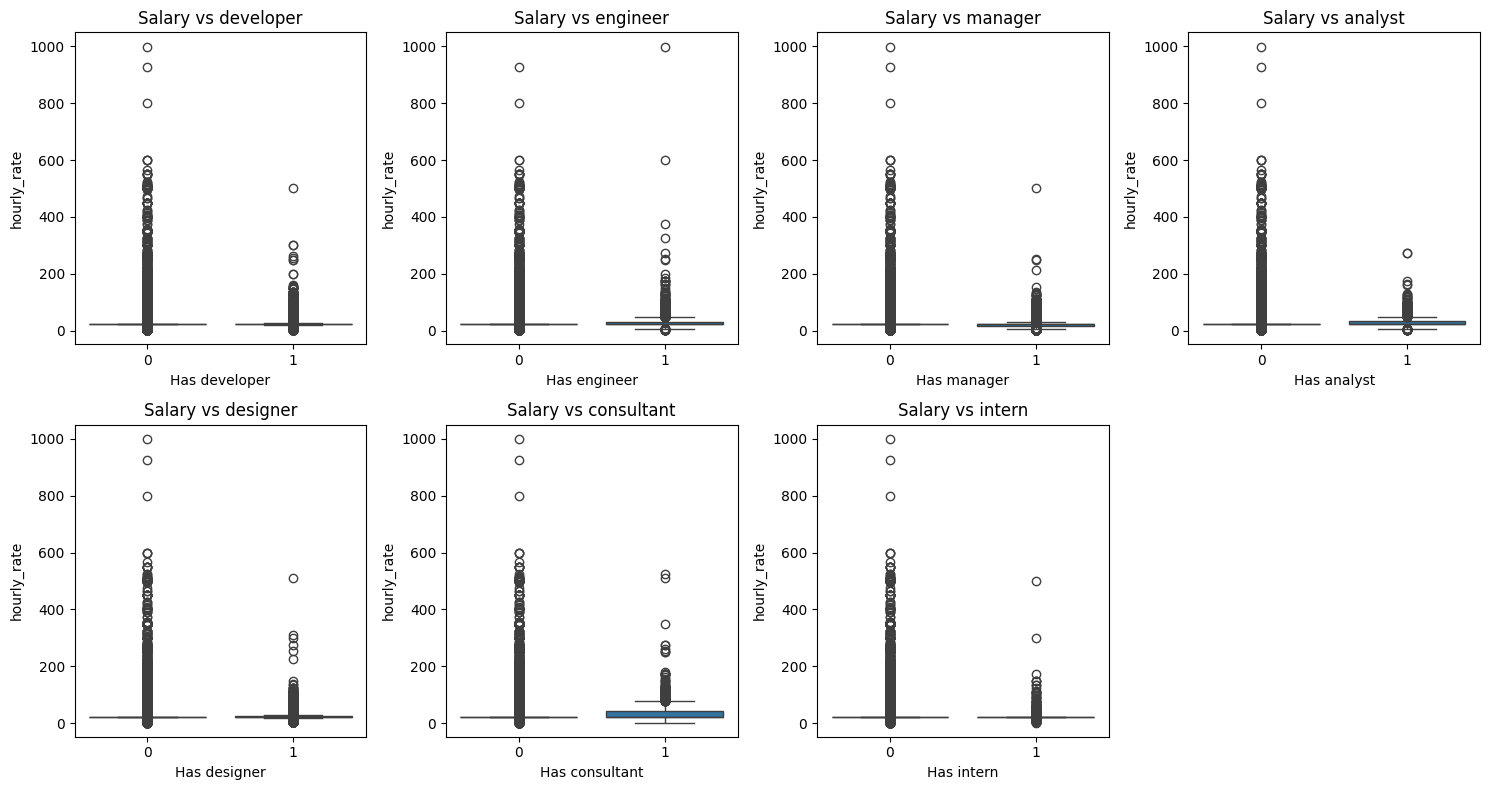

In [34]:
plt.figure(figsize=(15,8))
for i, kw in enumerate(keywords):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[f'has_{kw}'], y=df['hourly_rate'])
    plt.title(f'Salary vs {kw}')
    plt.xlabel(f'Has {kw}')
plt.tight_layout()
plt.show()


In [35]:
summary = {}
for kw in keywords:
    summary[kw] = df.groupby(f'has_{kw}')['hourly_rate'].mean().to_dict()

summary_df = pd.DataFrame(summary)
print(summary_df)


   developer   engineer    manager    analyst   designer  consultant  \
0  25.369728  25.327434  25.474354  25.382403  25.435186   25.315046   
1  25.885860  31.125193  23.022322  29.945969  24.856403   38.854438   

      intern  
0  25.394989  
1  28.608321  


**keyword vs salary**

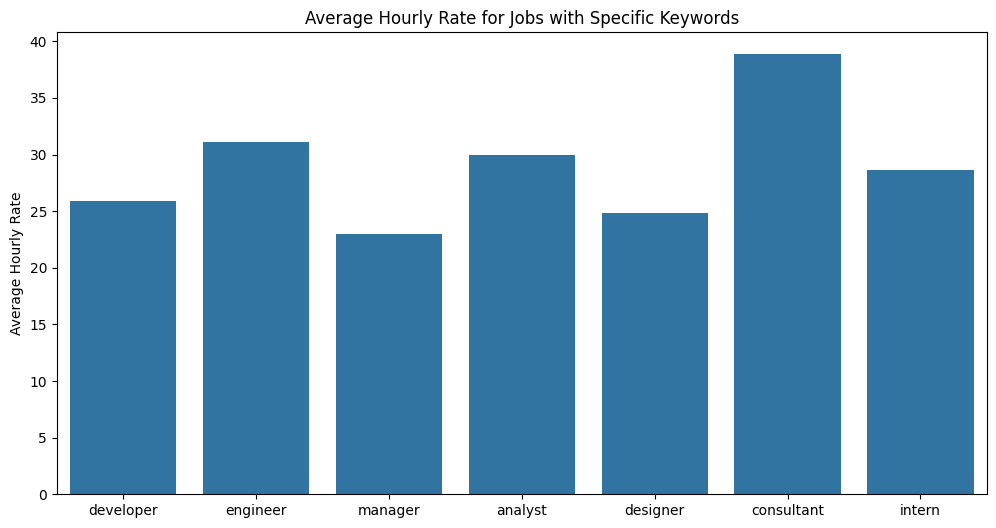

In [36]:
keywords = ['developer', 'engineer', 'manager', 'analyst', 'designer', 'consultant', 'intern']

plt.figure(figsize=(12,6))
avg_salary_kw = {kw: df[df[f'has_{kw}']==1]['hourly_rate'].mean() for kw in keywords}
sns.barplot(x=list(avg_salary_kw.keys()), y=list(avg_salary_kw.values()))
plt.title("Average Hourly Rate for Jobs with Specific Keywords")
plt.ylabel("Average Hourly Rate")
plt.show()


**salary distribution by country**

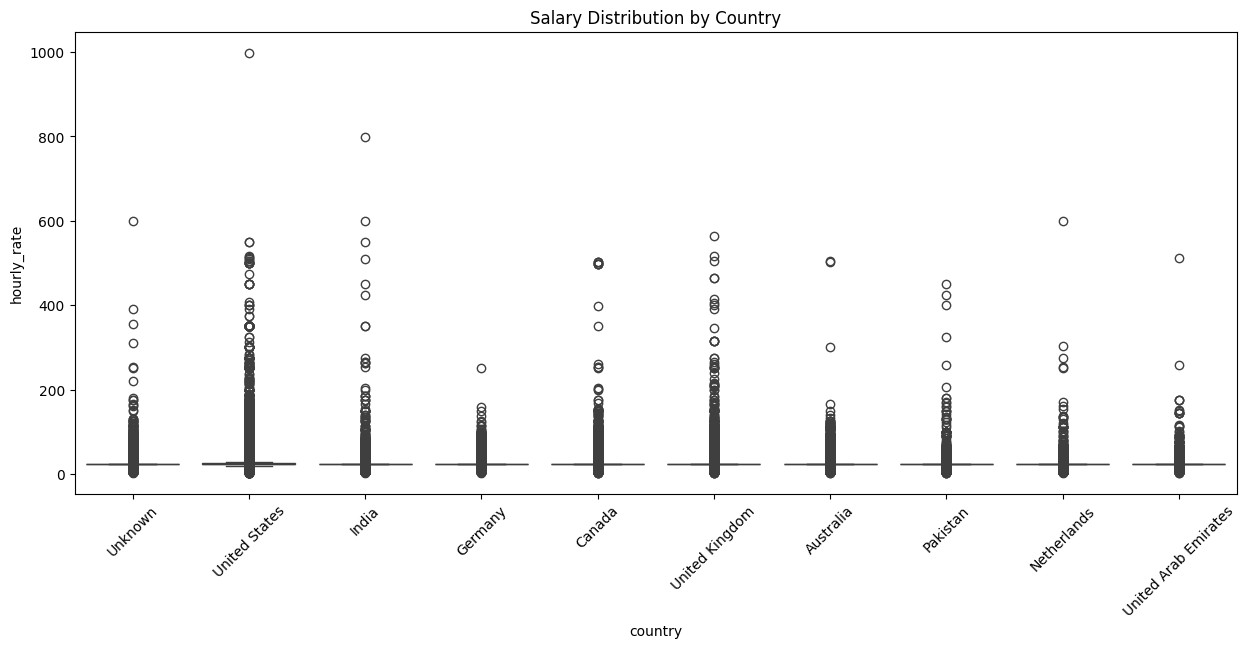

In [37]:
# Identify country columns
country_cols = [col for col in df.columns if col.startswith('country_')]

# Create a new column with the actual country name
df['country'] = df[country_cols].idxmax(axis=1).str.replace('country_', '')

# Now proceed with your original analysis
df_plot = df.dropna(subset=['country', 'hourly_rate']).copy()

# Get top 10 countries based on job count
top_countries = df_plot['country'].value_counts().index[:10]

# Create the boxplot
plt.figure(figsize=(15,6))
sns.boxplot(x='country', y='hourly_rate', data=df_plot[df_plot['country'].isin(top_countries)])
plt.xticks(rotation=45)
plt.title("Salary Distribution by Country")
plt.show()

**Salary Band Proportion per Country (Pie Chart / Bar)**

We can calculate the percentage of jobs in Low, Mid, High salary bands per country

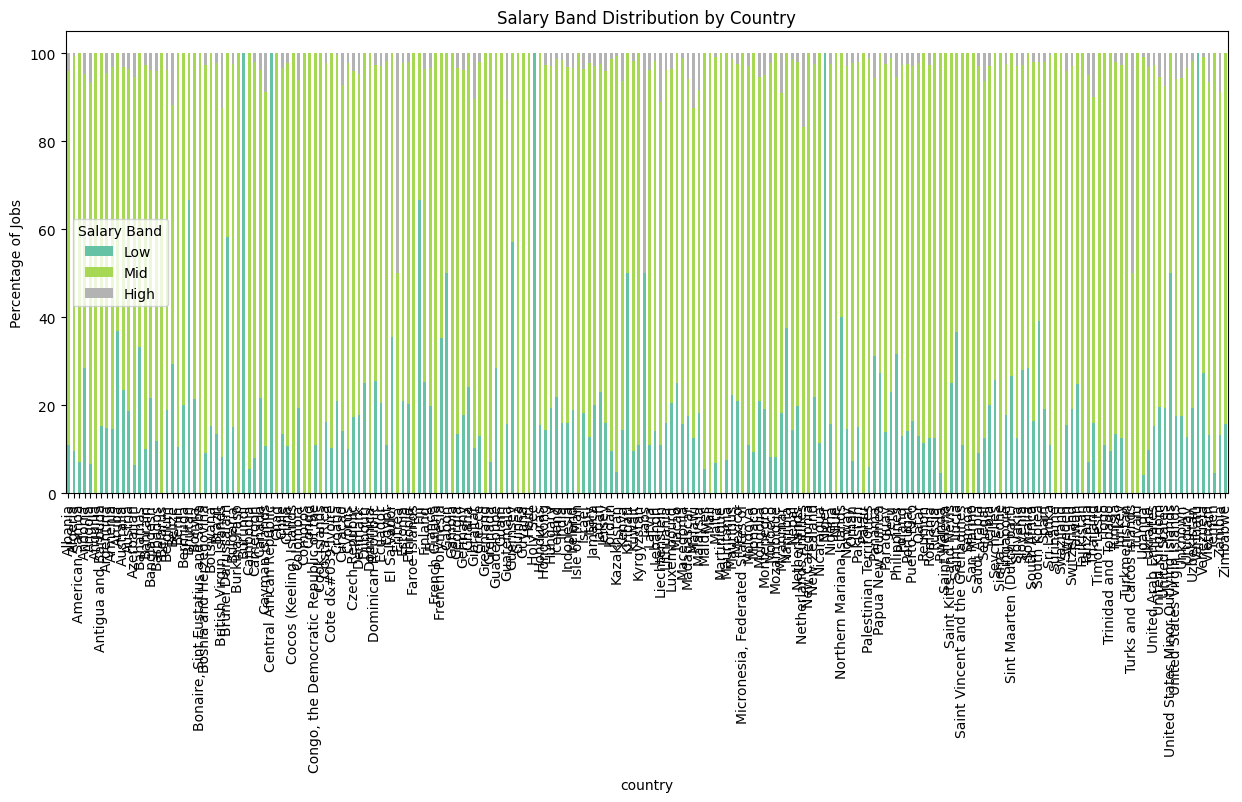

In [38]:
# Check if original 'country' and 'salary_band' columns exist
if 'country' in df.columns and 'salary_band' in df.columns:
    country_salary = df.groupby(['country', 'salary_band']).size().unstack(fill_value=0)
    country_salary_percent = country_salary.div(country_salary.sum(axis=1), axis=0) * 100

    # Bar plot
    country_salary_percent.plot(kind='bar', stacked=True, figsize=(15,6), colormap='Set2')
    plt.ylabel("Percentage of Jobs")
    plt.title("Salary Band Distribution by Country")
    plt.legend(title="Salary Band")
    plt.show()

**scatter Plot: Hourly Rate vs Keywords Presence**

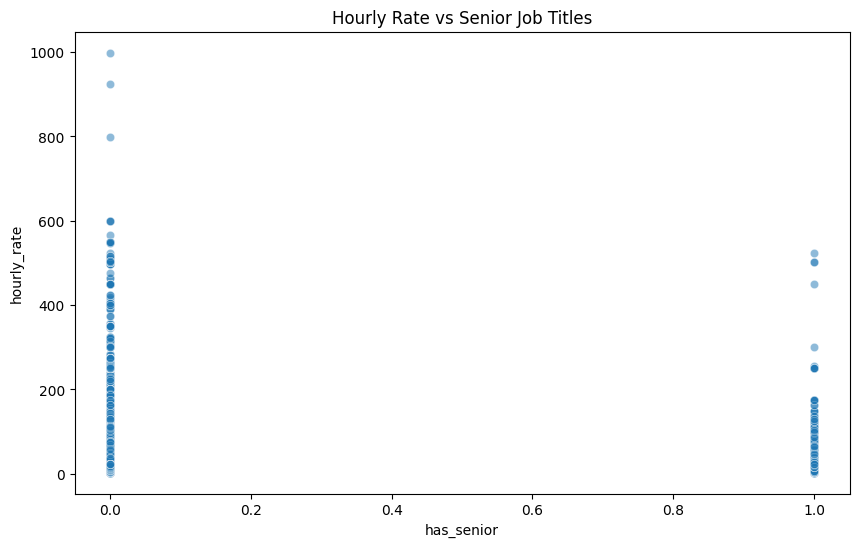

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='has_senior', y='hourly_rate', data=df, alpha=0.5)
plt.title("Hourly Rate vs Senior Job Titles")
plt.show()


**Correlation Heatmap (Keyword vs Salary)**

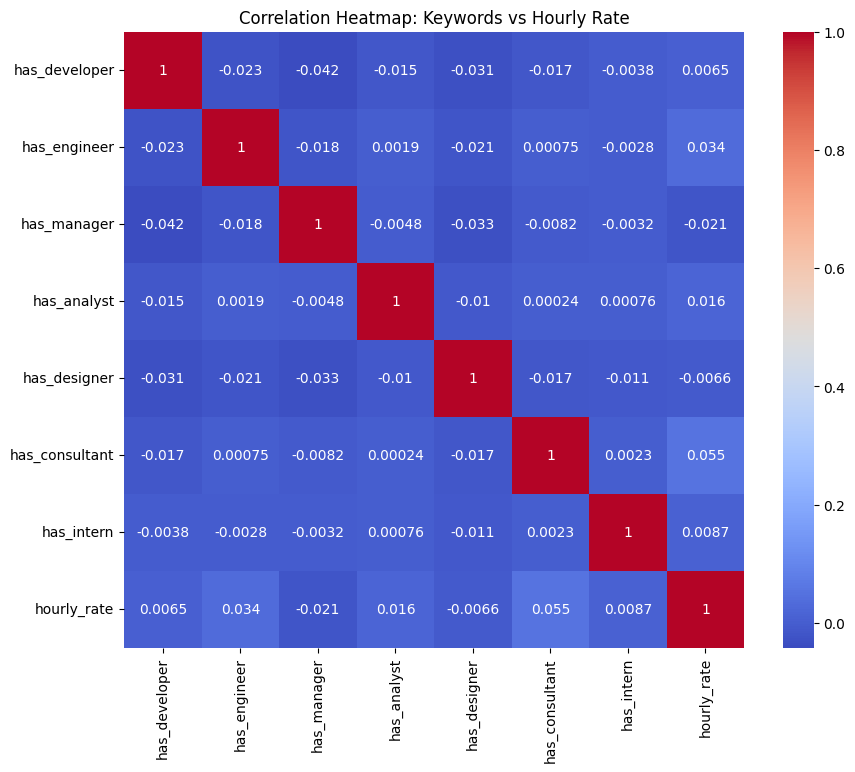

In [40]:
keyword_cols = [f'has_{kw}' for kw in keywords] + ['hourly_rate']
plt.figure(figsize=(10,8))
sns.heatmap(df[keyword_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Keywords vs Hourly Rate")
plt.show()


**Histogram of Salaries**

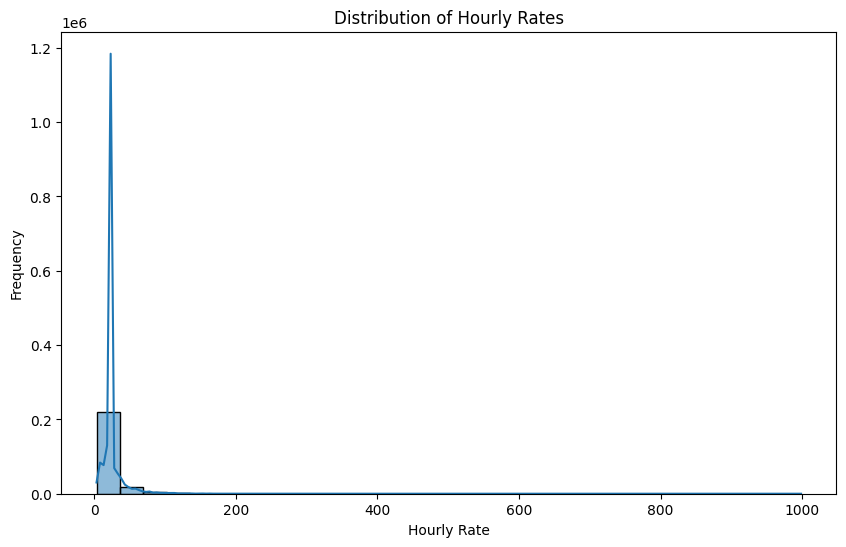

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df['hourly_rate'], bins=30, kde=True)
plt.title("Distribution of Hourly Rates")
plt.xlabel("Hourly Rate")
plt.ylabel("Frequency")
plt.show()


**Pie Chart for Overall Salary Bands**

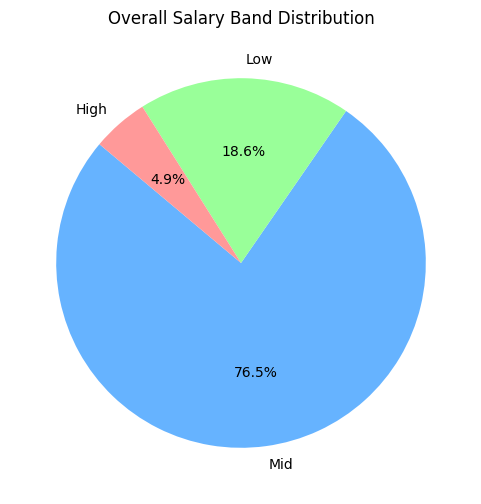

In [42]:
salary_counts = df['salary_band'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title("Overall Salary Band Distribution")
plt.show()


In [43]:
# CSV में save करना
df.to_csv("task1_cleaned_data.csv", index=False, encoding="utf-8")

print("Final processed dataset saved as task1_cleaned_data.csv")
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)

Final processed dataset saved as task1_cleaned_data.csv
Columns: ['title', 'link', 'published_date', 'is_hourly', 'hourly_low', 'hourly_high', 'budget', 'hourly_rate', 'title_clean', 'has_senior', 'has_junior', 'year', 'month', 'dayofweek', 'salary_band', 'salary_band_encoded', 'country_Albania', 'country_Algeria', 'country_American Samoa', 'country_Andorra', 'country_Angola', 'country_Anguilla', 'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia', 'country_Aruba', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahamas', 'country_Bahrain', 'country_Bangladesh', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Belize', 'country_Benin', 'country_Bermuda', 'country_Bhutan', 'country_Bolivia', 'country_Bonaire, Sint Eustatius and Saba', 'country_Bosnia and Herzegovina', 'country_Botswana', 'country_Brazil', 'country_British Virgin Islands', 'country_Brunei Darussalam', 'country_Bulgaria', 'country_Burkina Faso', 'country_Burundi',

# Task 2: Identify emerging job categories based on posting frequency


In [44]:
# Define some main job categories (example)
categories = {
    'developer': ['developer', 'programmer', 'software'],
    'engineer': ['engineer', 'engineering'],
    'manager': ['manager', 'lead', 'head'],
    'analyst': ['analyst', 'analytics', 'data'],
    'designer': ['designer', 'design', 'ux', 'ui'],
    'consultant': ['consultant', 'advisor'],
    'intern': ['intern', 'trainee']
}

# Initialize category column
df['job_category'] = 'other'

for cat, keywords in categories.items():
    mask = df['title_clean'].str.contains('|'.join(keywords), case=False, na=False)
    df.loc[mask, 'job_category'] = cat

# Quick check
df[['title_clean', 'job_category']].head(10)


,title_clean,job_category
0,experienced media buyer for solar pannel and r...,other
1,full stack developer,developer
2,smma bubble app,other
3,talent hunter specialized in marketing,other
4,data engineer,analyst
5,seo for portuguese psychologist site,other
6,want to fix the wordpress plugin,other
7,need portuguese writers who can understand and...,other
8,looker studio dashboard for leadgen and ecomme...,manager
9,phphtmlcss wordpress developer needed for webs...,developer


**Count Postings per Category Over Time**

We’ll use year and month to see posting trends:

In [45]:
# Group by month and category
df['year_month'] = df['published_date'].dt.to_period('M')  # if published_date is datetime
trend_df = df.groupby(['year_month', 'job_category']).size().reset_index(name='postings')

# Pivot for visualization
trend_pivot = trend_df.pivot(index='year_month', columns='job_category', values='postings').fillna(0)
trend_pivot.head()


job_category,analyst,consultant,designer,developer,engineer,intern,manager,other
year_month,,,,,,,,
2023-11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-12,1.0,0.0,1.0,0.0,0.0,1.0,0.0,7.0
2024-01,3.0,2.0,9.0,6.0,2.0,0.0,13.0,61.0
2024-02,3821.0,815.0,17568.0,6233.0,1022.0,272.0,4389.0,67767.0
2024-03,4648.0,1132.0,25216.0,8994.0,1447.0,433.0,6467.0,94497.0


**Identify Emerging Categories**

Emerging categories are those with increasing posting frequency. A simple approach: calculate growth rate over time:

In [46]:
# Calculate month-over-month growth rate
growth_rate = trend_pivot.pct_change().fillna(0)  # percentage change
avg_growth = growth_rate.mean().sort_values(ascending=False)

print("Average monthly growth rate by category:")
print(avg_growth)


Average monthly growth rate by category:
job_category
analyst       inf
consultant    inf
designer      inf
developer     inf
engineer      inf
intern        inf
manager       inf
other         inf
dtype: float64


Positive and higher growth → emerging job categories

Negative or low growth → mature/stable categories

**Visualize Posting Trends**

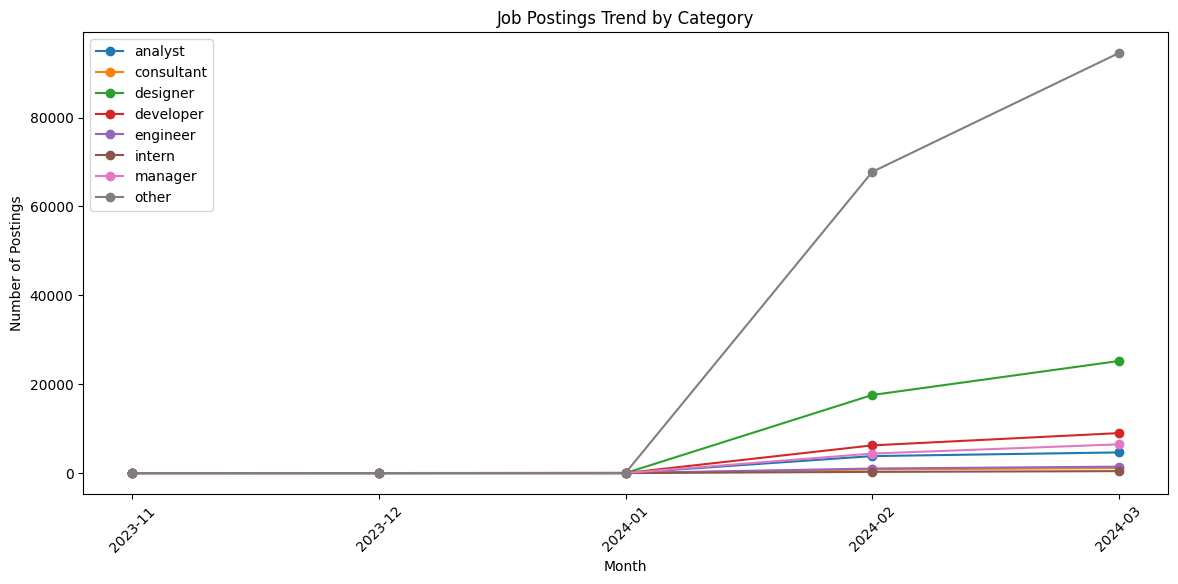

In [47]:
plt.figure(figsize=(14,6))
for cat in trend_pivot.columns:
    plt.plot(trend_pivot.index.astype(str), trend_pivot[cat], marker='o', label=cat)

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Postings")
plt.title("Job Postings Trend by Category")
plt.legend()
plt.show()


This shows which categories are increasing over time.

In [48]:
emerging_categories = avg_growth[avg_growth > 0.05]  # example threshold 5% average growth
emerging_summary = pd.DataFrame({
    'category': emerging_categories.index,
    'avg_monthly_growth': emerging_categories.values
}).reset_index(drop=True)

print("Emerging Job Categories:")
print(emerging_summary)


Emerging Job Categories:
     category  avg_monthly_growth
0     analyst                 inf
1  consultant                 inf
2    designer                 inf
3   developer                 inf
4    engineer                 inf
5      intern                 inf
6     manager                 inf
7       other                 inf


#Task 3: Predict high-demand job roles by analyzing job posting patterns over time

**Aggregate Weekly Postings & Top Job Roles**

In [49]:
# : Weekly Aggregation & Top Roles
# ----------------------------
# Daily postings
daily_postings = df.groupby('published_date').size().reset_index(name='count')
daily_postings.set_index('published_date', inplace=True)

# Weekly resample
weekly_postings = daily_postings.resample('W').sum()

# Top 10 job roles
top_job_roles = df['title_clean'].value_counts().head(10).index.tolist()

# Weekly time series per role
role_time_series = {}
for role in top_job_roles:
    role_df = df[df['title_clean'] == role]
    role_daily = role_df.groupby('published_date').size().reset_index(name='count')
    role_daily.set_index('published_date', inplace=True)
    role_weekly = role_daily.resample('W').sum()
    role_time_series[role] = role_weekly

print("Weekly aggregation done. Top roles:", top_job_roles)


Weekly aggregation done. Top roles: ['social media manager', 'logo design', 'video editor', 'virtual assistant', 'graphic designer', 'youtube video editor', 'lead generation', 'full stack developer', 'logo designer', 'data entry']


**ML random forest**

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# : Random Forest on Weekly Postings
X = np.arange(len(weekly_postings)).reshape(-1, 1)  # Time index
y = weekly_postings['count'].values

# Train-test split (80%-20%)
train_size = int(len(X) * 0.8)
X_train_ml, X_test_ml = X[:train_size], X[train_size:]
y_train_ml, y_test_ml = y[:train_size], y[train_size:]

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_ml, y_train_ml)

# Predictions
y_pred_rf = rf_model.predict(X_test_ml)

# Evaluation
train_rmse_ml = np.sqrt(mean_squared_error(y_train_ml, rf_model.predict(X_train_ml)))
test_rmse_ml = np.sqrt(mean_squared_error(y_test_ml, y_pred_rf))
train_mae_ml = mean_absolute_error(y_train_ml, rf_model.predict(X_train_ml))
test_mae_ml = mean_absolute_error(y_test_ml, y_pred_rf)

print(f"RF Train RMSE: {train_rmse_ml:.2f}, Test RMSE: {test_rmse_ml:.2f}")
print(f"RF Train MAE: {train_mae_ml:.2f}, Test MAE: {test_mae_ml:.2f}")


RF Train RMSE: 2719.20, Test RMSE: 25677.23
RF Train MAE: 777.33, Test MAE: 25620.96


In [55]:
from sklearn.ensemble import RandomForestRegressor

salary_model = RandomForestRegressor()
salary_model.fit(X_train, y_train)

# Save model
import joblib, os
os.makedirs("models", exist_ok=True)
joblib.dump(salary_model, "models/salary_predictor.pkl")


['models/salary_predictor.pkl']

# Lstm

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pickle
import joblib
# LSTM Sequence Preparation
# ----------------------------
def create_sequences(data, time_steps=4):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:(i + time_steps)])
        y_seq.append(data[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(weekly_postings.values)

time_steps = 4
X_lstm, y_lstm = create_sequences(scaled_data, time_steps)

# Train-test split
train_size_lstm = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size_lstm], X_lstm[train_size_lstm:]
y_train_lstm, y_test_lstm = y_lstm[:train_size_lstm], y_lstm[train_size_lstm:]

# Reshape for LSTM
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)


**Biuld $ train lstm**

In [56]:
# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

# Train
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32,
                    validation_data=(X_test_lstm, y_test_lstm), verbose=1, shuffle=False)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 0.1068 - val_loss: 0.8658
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - loss: 0.1049 - val_loss: 0.8460
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 0.1034 - val_loss: 0.8265
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 0.1011 - val_loss: 0.8061
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 0.0996 - val_loss: 0.7850
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 0.0975 - val_loss: 0.7627
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 0.0970 - val_loss: 0.7397
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - loss: 0.0964 - val_loss: 0.7162
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 0.0937 - val_loss: 0.6917
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 0.0901 - val_loss: 0.6658
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 0.0926 - val_loss: 0.6401
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 0.0904 - val_los

In [57]:
#: LSTM Predictions
train_pred_lstm = model.predict(X_train_lstm)
test_pred_lstm = model.predict(X_test_lstm)

# Inverse transform
train_pred_lstm_inv = scaler.inverse_transform(train_pred_lstm)
y_train_inv = scaler.inverse_transform(y_train_lstm.reshape(-1,1))
test_pred_lstm_inv = scaler.inverse_transform(test_pred_lstm)
y_test_inv = scaler.inverse_transform(y_test_lstm.reshape(-1,1))

# Metrics
train_rmse_lstm = np.sqrt(mean_squared_error(y_train_inv, train_pred_lstm_inv))
test_rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, test_pred_lstm_inv))
train_mae_lstm = mean_absolute_error(y_train_inv, train_pred_lstm_inv)
test_mae_lstm = mean_absolute_error(y_test_inv, test_pred_lstm_inv)

print(f"LSTM Train RMSE: {train_rmse_lstm:.2f}, Test RMSE: {test_rmse_lstm:.2f}")
print(f"LSTM Train MAE: {train_mae_lstm:.2f}, Test MAE: {test_mae_lstm:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
LSTM Train RMSE: 13529.21, Test RMSE: 25878.93
LSTM Train MAE: 9779.18, Test MAE: 24980.45


In [58]:
# : Forecast Future Weeks
last_sequence = scaled_data[-time_steps:]
future_weeks = 4
future_preds = []

for _ in range(future_weeks):
    seq_input = last_sequence.reshape(1, time_steps, 1)
    next_val = model.predict(seq_input, verbose=0)
    future_preds.append(next_val[0,0])
    last_sequence = np.append(last_sequence[1:], next_val)

future_preds_inv = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))
future_dates = pd.date_range(start=weekly_postings.index[-1] + pd.Timedelta(weeks=1),
                             periods=future_weeks, freq='W')


In [59]:
#  High-Demand Roles Analysis
role_trends = {}
for role, data in role_time_series.items():
    x = np.arange(len(data)).reshape(-1,1)
    y_val = data.values
    slope = np.polyfit(x.flatten(), y_val.flatten(), 1)[0]
    role_trends[role] = slope

# Sort by slope
high_demand_roles = sorted(role_trends.items(), key=lambda x: x[1], reverse=True)
print("High-Demand Job Roles by Trend:")
for role, trend in high_demand_roles:
    print(f"{role}: {trend:.2f}")


High-Demand Job Roles by Trend:
virtual assistant: 9.20
video editor: 6.74
graphic designer: 5.54
logo design: 5.00
lead generation: 3.89
youtube video editor: 2.09
social media manager: 1.40
full stack developer: 1.20
logo designer: 0.14
data entry: -2.31


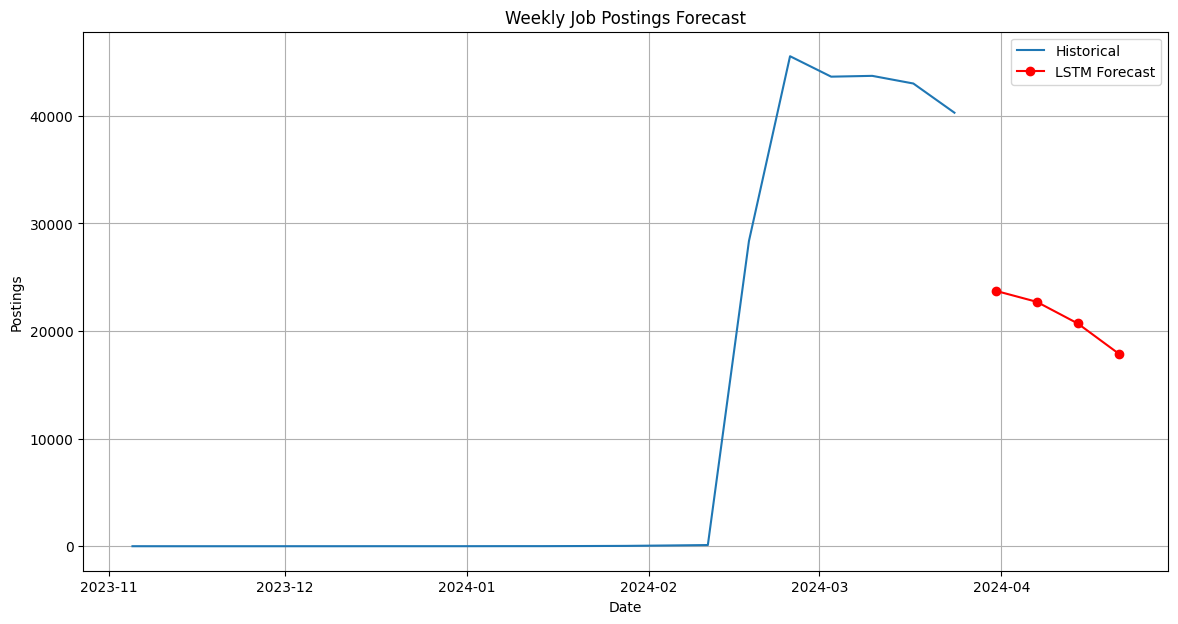

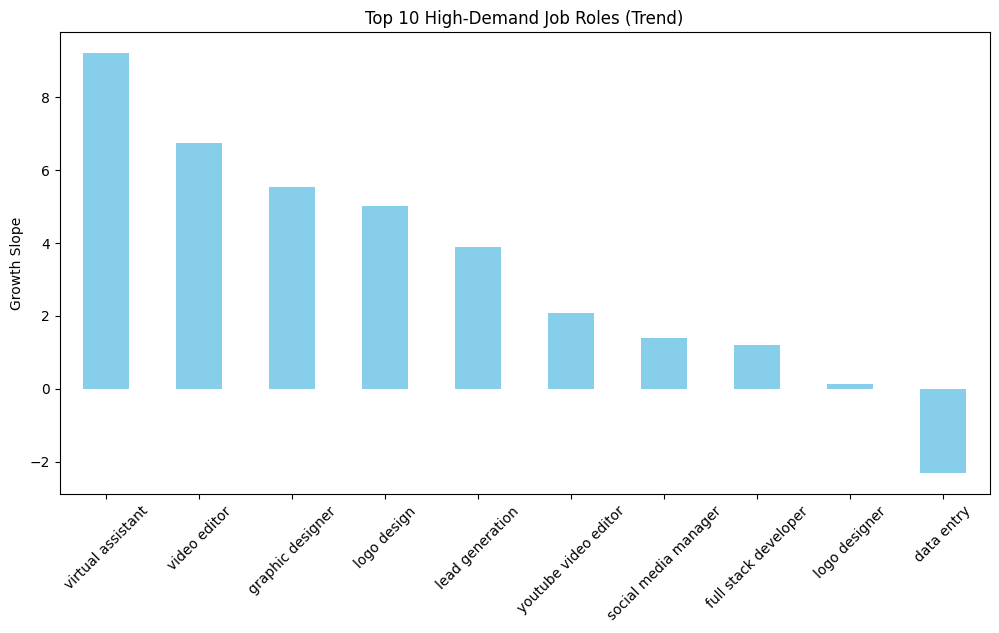

Future predictions table saved successfully!


In [60]:
# Plot & Save
# Forecast plot
plt.figure(figsize=(14,7))
plt.plot(weekly_postings.index, weekly_postings.values, label='Historical')
plt.plot(future_dates, future_preds_inv, 'ro-', label='LSTM Forecast')
plt.title('Weekly Job Postings Forecast')
plt.xlabel('Date')
plt.ylabel('Postings')
plt.legend()
plt.grid(True)
plt.show()

# Top roles plot
plt.figure(figsize=(12,6))
pd.Series(dict(high_demand_roles)).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 High-Demand Job Roles (Trend)')
plt.ylabel('Growth Slope')
plt.xticks(rotation=45)
plt.show()

# Save Models & Scaler
model.save('task3_lstm_model.h5')
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
joblib.dump(rf_model, 'task3_rf_model.pkl')

# Export predictions table
future_table = pd.DataFrame({
    'week': future_dates,
    'predicted_postings_lstm': future_preds_inv.flatten(),
    'predicted_postings_rf': rf_model.predict(np.arange(len(weekly_postings), len(weekly_postings)+future_weeks).reshape(-1,1))
})
future_table.to_csv('task3_future_predictions.csv', index=False)
print("Future predictions table saved successfully!")


# Task 4: Compare average hourly rates across different countries

In [61]:
# Average hourly rate per country (use country name directly)
avg_hourly_country = df.groupby('country')['hourly_rate'].mean().sort_values(ascending=False)
print("Average Hourly Rate per Country:\n", avg_hourly_country)

Average Hourly Rate per Country:
 country
Laos                        155.125000
Eritrea                      61.250000
Turks and Caicos Islands     46.625000
Malawi                       42.375000
Netherlands Antilles         35.416667
                               ...    
Niger                        16.500000
Brunei Darussalam            15.875000
Fiji                         15.833333
Vanuatu                       6.500000
Central African Republic      5.000000
Name: hourly_rate, Length: 212, dtype: float64


In [62]:
#Count of Jobs per Country
job_count_country = df['country'].value_counts()
print("Job Count per Country:\n", job_count_country)


Job Count per Country:
 country
United States               99834
United Kingdom              19149
India                       15835
Australia                   12618
Canada                      11658
                            ...  
Faroe Islands                   1
Central African Republic        1
Saint Helena                    1
Vanuatu                         1
French Guiana                   1
Name: count, Length: 212, dtype: int64


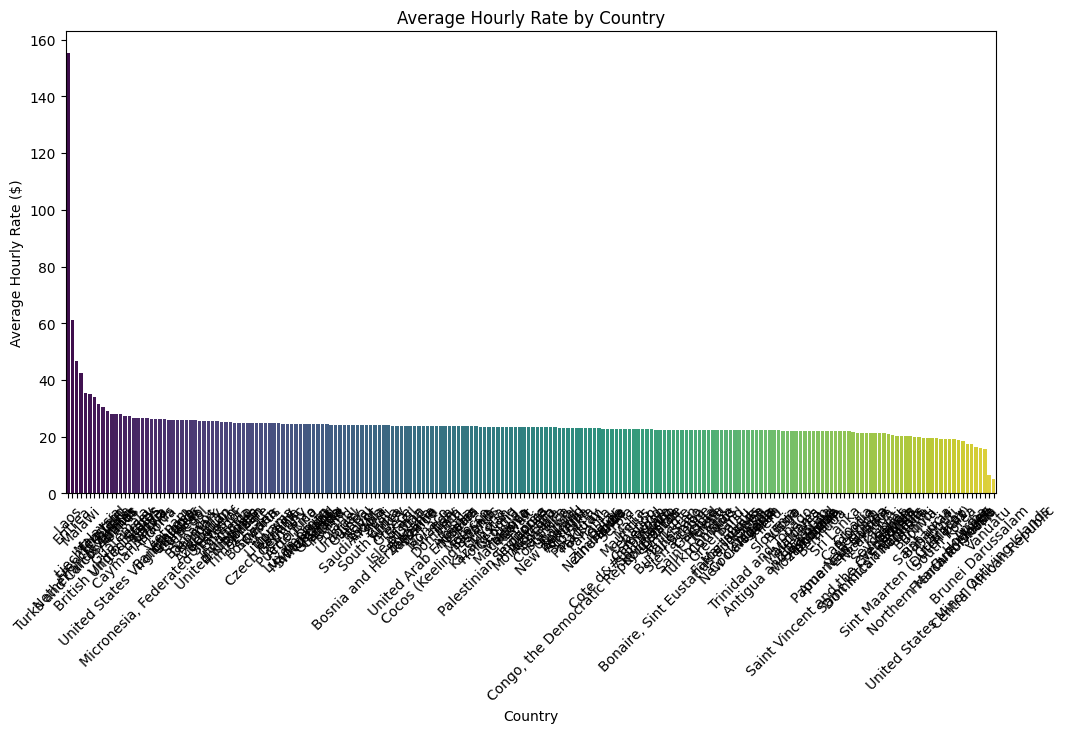

In [63]:
# Bar Plot of Average Hourly Rate
plt.figure(figsize=(12,6))
sns.barplot(x=avg_hourly_country.index, y=avg_hourly_country.values, palette='viridis')
plt.title("Average Hourly Rate by Country")
plt.ylabel("Average Hourly Rate ($)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


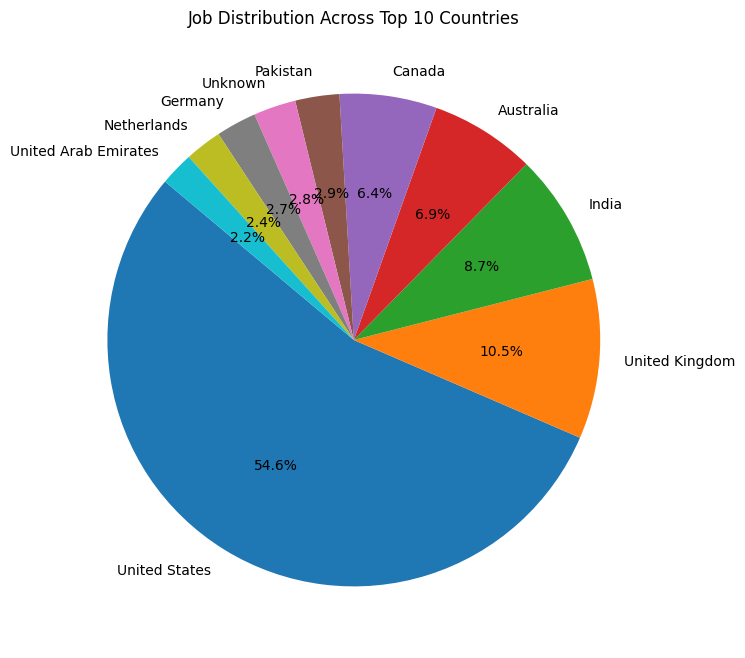

In [64]:
# Pie Chart of Job Distribution (Top 10 Countries)
plt.figure(figsize=(8,8))
top_countries = job_count_country.head(10)
plt.pie(top_countries.values, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title("Job Distribution Across Top 10 Countries")
plt.show()


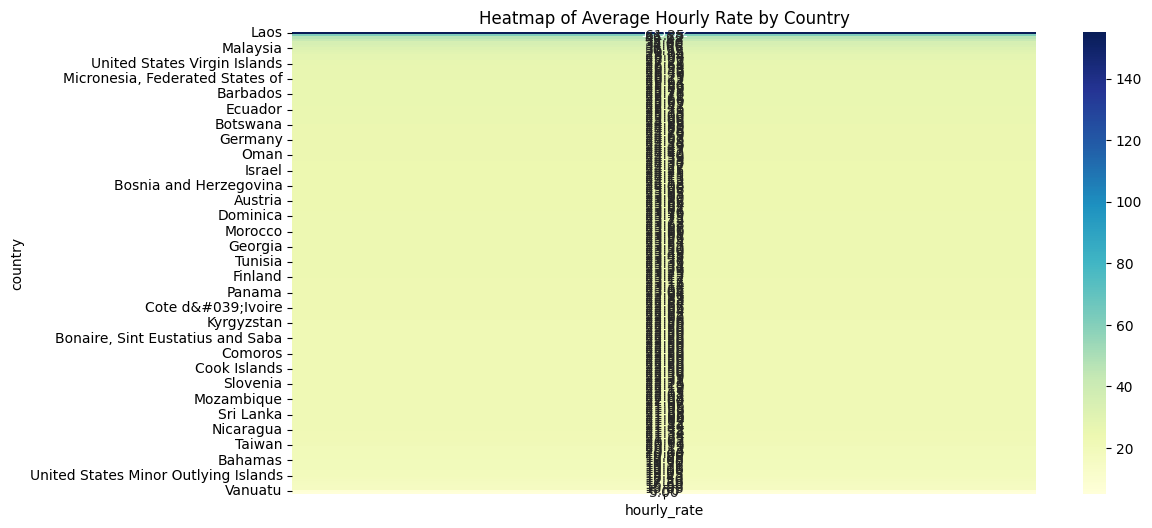

In [65]:
#heatmap average hourly
plt.figure(figsize=(12,6))
country_salary_matrix = df.pivot_table(index='country', values='hourly_rate', aggfunc='mean')
sns.heatmap(country_salary_matrix.sort_values('hourly_rate', ascending=False), annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Heatmap of Average Hourly Rate by Country")
plt.show()


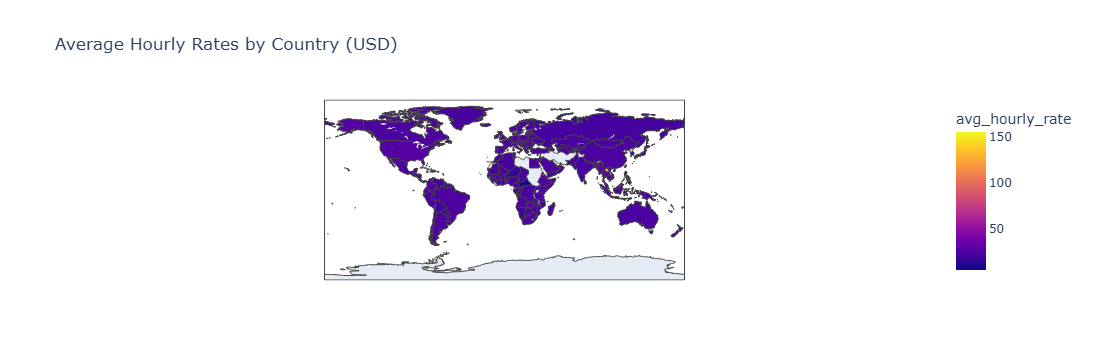

In [66]:
import plotly.express as px

# Create a DataFrame for mapping
map_df = avg_hourly_country.reset_index()
map_df.columns = ['country', 'avg_hourly_rate']

# Choropleth map
fig = px.choropleth(
    map_df,
    locations="country",
    locationmode='country names',  # uses country names
    color="avg_hourly_rate",
    hover_name="country",
    hover_data={"avg_hourly_rate": True},
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Average Hourly Rates by Country (USD)"
)

fig.show()


In [67]:
# Save the results to a CSV file
# Change 'country_rates' to 'avg_hourly_country' to save the correct DataFrame
if 'avg_hourly_country' in locals() and not avg_hourly_country.empty:
    avg_hourly_country.to_csv('country_hourly_rates.csv', index=False)
    print("\nResults saved to 'country_hourly_rates.csv'")
else:
    print("\nDataFrame 'avg_hourly_country' not found or is empty. Cannot save to CSV.")


Results saved to 'country_hourly_rates.csv'


# Task 5: Create a job recommendation engine based on current job postings

**Text processing**

In [68]:
# Download NLTK resources
#nltk.download('stopwords')
#nltk.download('wordnet')

def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special chars/digits
    words = text.split()

    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    return ' '.join(words)

# Apply preprocessing
df['processed_title'] = df['title_clean'].apply(preprocess_text)

# Combine features for recommendation
df['recommendation_features'] = df['processed_title'] + ' ' + df['country'].fillna('')



In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000, stop_words='english', min_df=5)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['recommendation_features'])

# Map job titles to indices
job_indices = pd.Series(df.index, index=df['title']).drop_duplicates()



In [70]:
# Fit NearestNeighbors (avoids full cosine similarity)
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute')
nn_model.fit(tfidf_matrix)

def get_content_based_recommendations(title, num_recommendations=10):
    if title not in job_indices:
        return pd.DataFrame(columns=['title','country','hourly_rate'])
    idx = job_indices[title]
    distances, indices = nn_model.kneighbors(tfidf_matrix[idx], n_neighbors=num_recommendations+1)
    recommended_indices = indices.flatten()[1:]  # skip itself
    return df[['title','country','hourly_rate']].iloc[recommended_indices]


In [71]:
kmeans = KMeans(n_clusters=10, random_state=42)
df['job_cluster'] = kmeans.fit_predict(tfidf_matrix)

# Create user profiles
def create_user_profiles(num_users=1000):
    np.random.seed(42)
    profiles = []
    for user_id in range(num_users):
        profile = {
            'user_id': user_id,
            'preferred_clusters': np.random.choice(range(10), size=3).tolist(),
            'preferred_countries': np.random.choice(df['country'].unique(), size=3).tolist(),
            'min_salary': np.random.uniform(10, 50),
            'prefers_remote': np.random.choice([True, False])
        }
        profiles.append(profile)
    return pd.DataFrame(profiles)

user_profiles_df = create_user_profiles()


In [72]:
def get_hybrid_recommendations(user_id, title=None, num_recommendations=10):
    if title:
        content_recs = get_content_based_recommendations(title, num_recommendations)
        collab_recs = get_collaborative_recommendations(user_id, num_recommendations)
        all_recs = pd.concat([content_recs, collab_recs]).drop_duplicates()
        return all_recs.nlargest(num_recommendations, 'hourly_rate') if len(all_recs) > num_recommendations else all_recs
    else:
        return get_collaborative_recommendations(user_id, num_recommendations)


In [73]:
# save model
with open('tfidf_vectorizer.pkl','wb') as f: pickle.dump(tfidf_vectorizer, f)
with open('nn_model.pkl','wb') as f: pickle.dump(nn_model, f)
job_indices.to_pickle('job_indices.pkl')
user_profiles_df.to_pickle('user_profiles.pkl')
df.to_pickle('job_data.pkl')


# task 6  Track changes in job market dynamics over months 

In [74]:
# Average hourly rate per country
avg_hourly_country = df.groupby('country')['hourly_rate'].mean().sort_values(ascending=False)
print("Average Hourly Rate per Country (Top 20):\n", avg_hourly_country.head(20))


Average Hourly Rate per Country (Top 20):
 country
Laos                            155.125000
Eritrea                          61.250000
Turks and Caicos Islands         46.625000
Malawi                           42.375000
Netherlands Antilles             35.416667
Liechtenstein                    35.000000
French Guiana                    34.000000
Malaysia                         31.661130
Thailand                         30.319061
British Virgin Islands           29.145833
Myanmar                          28.045455
Zambia                           28.036765
Guatemala                        28.000000
United States                    27.223937
United States Virgin Islands     27.205882
Cayman Islands                   26.597826
Jersey                           26.540000
Colombia                         26.528046
Kenya                            26.490062
Latvia                           26.389299
Name: hourly_rate, dtype: float64


In [75]:
job_count_country = df['country'].value_counts()
print("Job Count per Country (Top 20):\n", job_count_country.head(20))


Job Count per Country (Top 20):
 country
United States           99834
United Kingdom          19149
India                   15835
Australia               12618
Canada                  11658
Pakistan                 5291
Unknown                  5077
Germany                  4844
Netherlands              4435
United Arab Emirates     4039
France                   3163
Spain                    2519
Singapore                2501
Philippines              2426
China                    2157
Israel                   2082
Ukraine                  2062
Italy                    1791
Switzerland              1767
Bangladesh               1767
Name: count, dtype: int64


In [76]:
date_col = None

for col in df.columns:
    if 'date' in col or 'at' in col:  # look for likely date columns
        date_col = col
        break

if date_col:
    df['job_date'] = pd.to_datetime(df[date_col], errors='coerce')
    df['month_year'] = df['job_date'].dt.to_period('M')
    print(f"Using '{date_col}' as date column.")
else:
    print("No date column found. Monthly trend analysis will be skipped.")


Using 'published_date' as date column.


In [77]:
# job per month 
if 'month_year' in df.columns:
    jobs_per_month = df.groupby('month_year').size()
    jobs_growth_rate = jobs_per_month.pct_change().fillna(0) * 100

    print("Jobs per month:\n", jobs_per_month)
    print("\nGrowth rate (% change month-over-month):\n", jobs_growth_rate)


Jobs per month:
 month_year
2023-11         1
2023-12        10
2024-01        96
2024-02    101887
2024-03    142834
Freq: M, dtype: int64

Growth rate (% change month-over-month):
 month_year
2023-11         0.000000
2023-12       900.000000
2024-01       860.000000
2024-02    106032.291667
2024-03        40.188640
Freq: M, dtype: float64


In [78]:
# average salary trend
if 'month_year' in df.columns and 'hourly_rate' in df.columns:
    avg_salary_per_month = df.groupby('month_year')['hourly_rate'].mean()
    print("Average Hourly Rate per Month:\n", avg_salary_per_month)


Average Hourly Rate per Month:
 month_year
2023-11    37.500000
2023-12    25.550000
2024-01    22.630208
2024-02    25.586542
2024-03    25.275792
Freq: M, Name: hourly_rate, dtype: float64


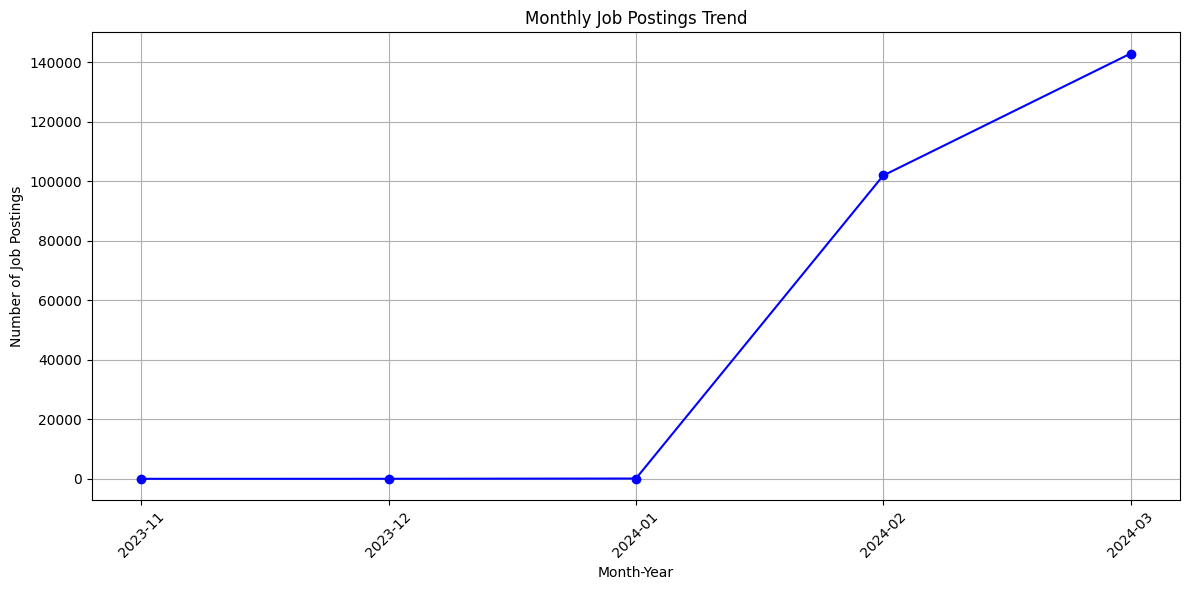

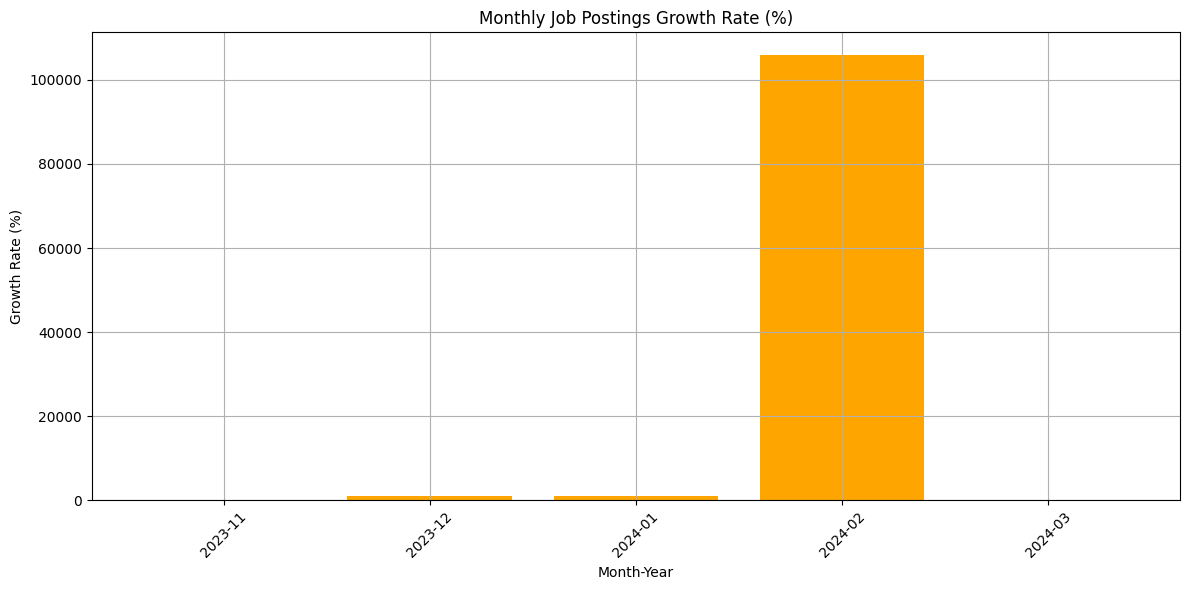

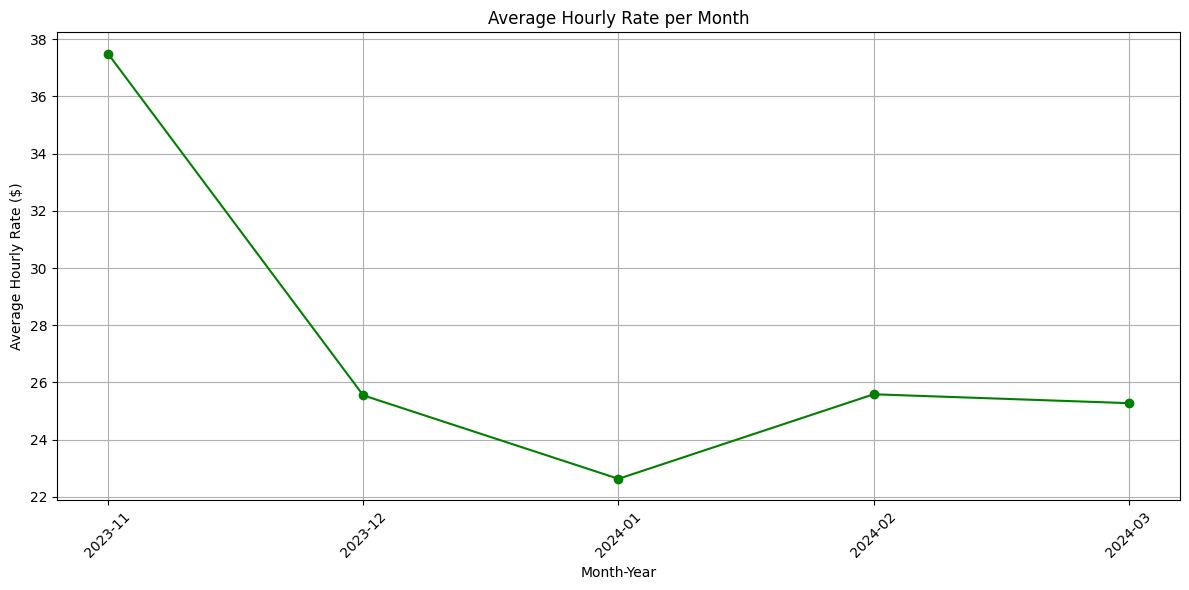

In [79]:
# plot
if 'month_year' in df.columns:
    # Jobs trend
    plt.figure(figsize=(12,6))
    plt.plot(jobs_per_month.index.astype(str), jobs_per_month.values, marker='o', color='blue')
    plt.title("Monthly Job Postings Trend")
    plt.xlabel("Month-Year")
    plt.ylabel("Number of Job Postings")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Growth rate
    plt.figure(figsize=(12,6))
    plt.bar(jobs_growth_rate.index.astype(str), jobs_growth_rate.values, color='orange')
    plt.title("Monthly Job Postings Growth Rate (%)")
    plt.xlabel("Month-Year")
    plt.ylabel("Growth Rate (%)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Salary trend
    if 'hourly_rate' in df.columns:
        plt.figure(figsize=(12,6))
        plt.plot(avg_salary_per_month.index.astype(str), avg_salary_per_month.values, marker='o', color='green')
        plt.title("Average Hourly Rate per Month")
        plt.xlabel("Month-Year")
        plt.ylabel("Average Hourly Rate ($)")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


month_year      2023-11  2023-12  2024-01  2024-02  2024-03
country                                                    
Albania               0        0        0       78      102
Algeria               0        0        0       66       91
American Samoa        0        0        0        6        8
Andorra               0        0        0        7       14
Angola                0        0        0       10        5


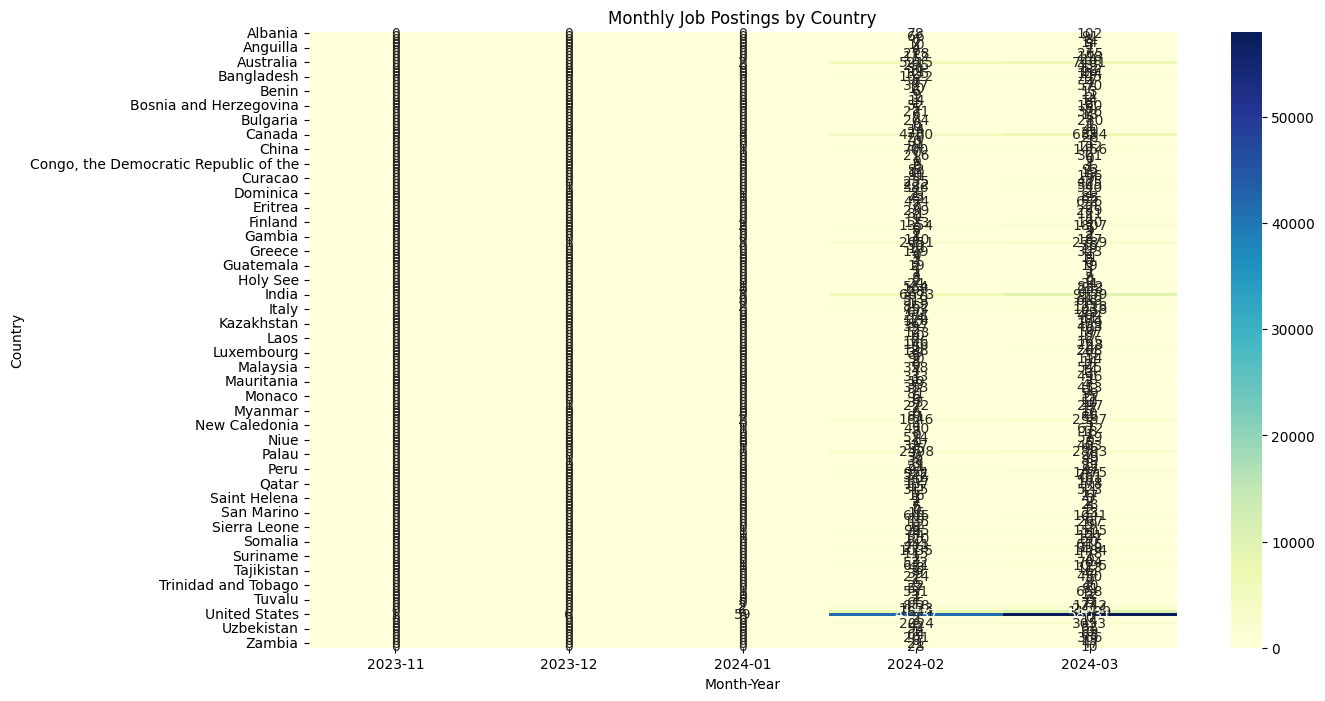

In [80]:
# country wise grow
if 'month_year' in df.columns:
    country_month = df.groupby(['country', 'month_year']).size().unstack(fill_value=0)
    print(country_month.head())

    # Optional heatmap
    import seaborn as sns
    plt.figure(figsize=(14,8))
    sns.heatmap(country_month, cmap='YlGnBu', annot=True, fmt="d")
    plt.title("Monthly Job Postings by Country")
    plt.xlabel("Month-Year")
    plt.ylabel("Country")
    plt.show()


In [81]:
# save dashboard
# Save summary CSV for dashboard use
if 'month_year' in df.columns:
    monthly_summary = pd.DataFrame({
        'jobs_posted': jobs_per_month,
        'growth_rate_pct': jobs_growth_rate,
        'avg_hourly_rate': avg_salary_per_month if 'hourly_rate' in df.columns else np.nan
    }).reset_index()

    monthly_summary.to_csv('monthly_job_summary.csv', index=False)
    print("Monthly summary saved to 'monthly_job_summary.csv'")


Monthly summary saved to 'monthly_job_summary.csv'


# Task 7: Investigate trends in the remote work landscape 

In [82]:
# Detect remote jobs using only the title
df['remote'] = df['title_clean'].str.contains('remote', case=False, na=False)

# Optional: see the count
print("Remote jobs count:", df['remote'].sum())



Remote jobs count: 1264


In [83]:
# Remote jobs detection from title_clean only
df['remote'] = df['title_clean'].str.contains('remote', case=False, na=False)


In [84]:
# monthly count
monthly_remote = df.groupby('month_year')['remote'].sum().reset_index()
monthly_remote.rename(columns={'remote': 'remote_job_count'}, inplace=True)
monthly_remote['total_jobs'] = df.groupby('month_year')['title_clean'].count().values

# Percentage of remote jobs
monthly_remote['remote_pct'] = (monthly_remote['remote_job_count'] / monthly_remote['total_jobs']) * 100

monthly_remote.head()


,month_year,remote_job_count,total_jobs,remote_pct
0,2023-11,0,1,0.000000
1,2023-12,0,10,0.000000
2,2024-01,3,96,3.125000
3,2024-02,523,101887,0.513314
4,2024-03,738,142834,0.516684


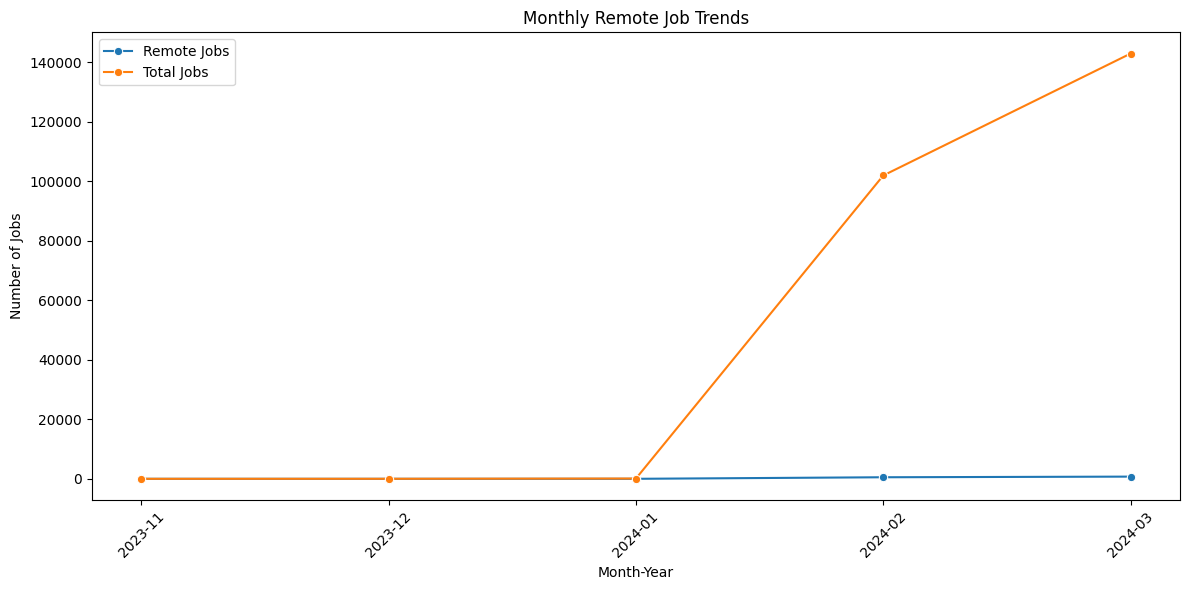

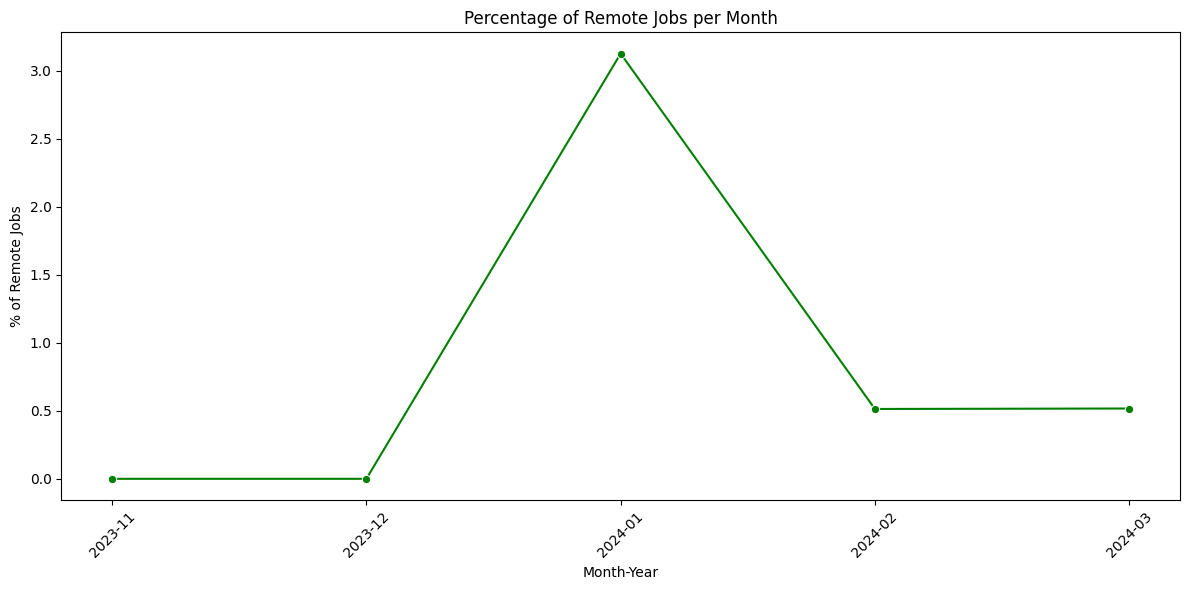

In [85]:
# Convert month_year to string for plotting
monthly_remote['month_year_str'] = monthly_remote['month_year'].astype(str)

# Plot number of remote jobs and total jobs
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_remote, x='month_year_str', y='remote_job_count', marker='o', label='Remote Jobs')
sns.lineplot(data=monthly_remote, x='month_year_str', y='total_jobs', marker='o', label='Total Jobs')
plt.xticks(rotation=45)
plt.title("Monthly Remote Job Trends")
plt.ylabel("Number of Jobs")
plt.xlabel("Month-Year")
plt.legend()
plt.tight_layout()
plt.show()

# Plot percentage of remote jobs
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_remote, x='month_year_str', y='remote_pct', marker='o', color='green')
plt.xticks(rotation=45)
plt.title("Percentage of Remote Jobs per Month")
plt.ylabel("% of Remote Jobs")
plt.xlabel("Month-Year")
plt.tight_layout()
plt.show()


# country wise remote job

In [86]:
# Make sure 'remote' column exists
df['remote'] = df['title_clean'].str.contains('remote', case=False, na=False)

# Group by country
country_remote = df.groupby('country')['remote'].sum()
country_total = df['country'].value_counts()

# Prepare DataFrame for plotting
country_remote_df = pd.DataFrame({
    'Remote Jobs': country_remote,
    'Non-Remote Jobs': country_total - country_remote
}).fillna(0)


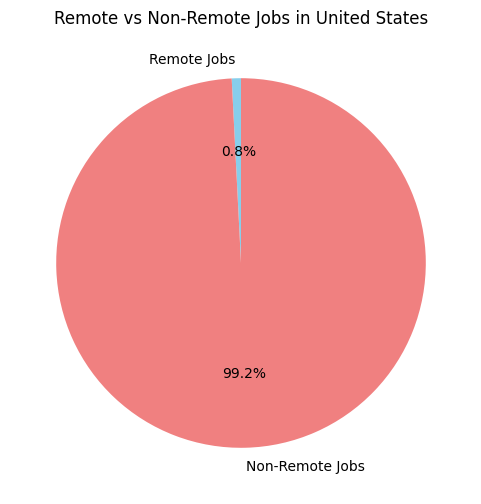

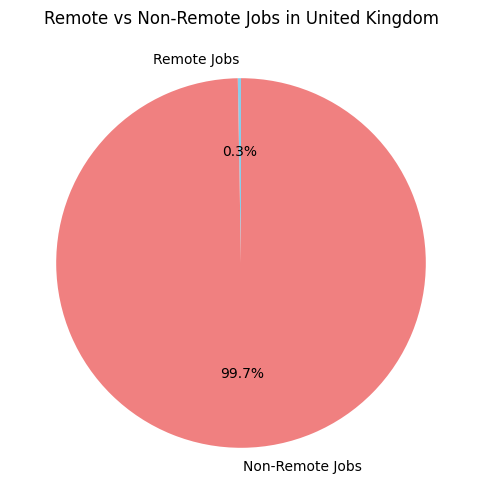

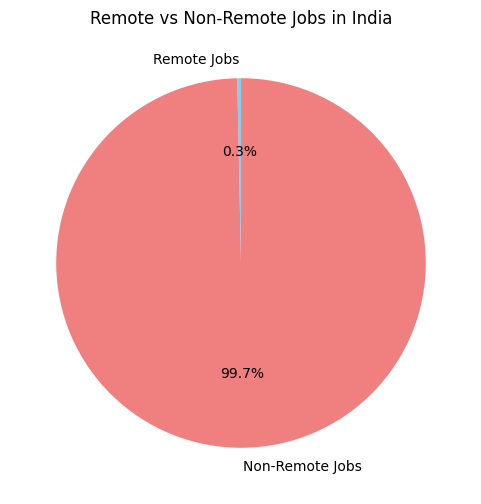

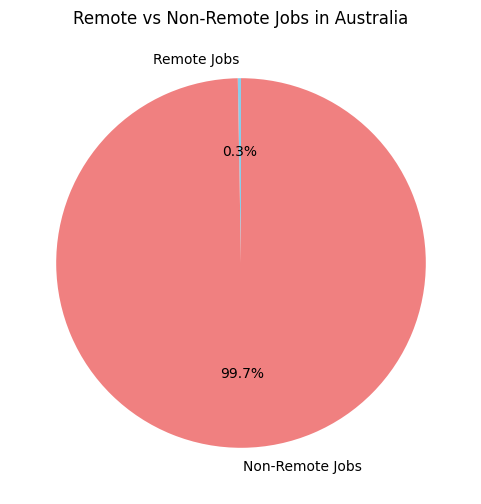

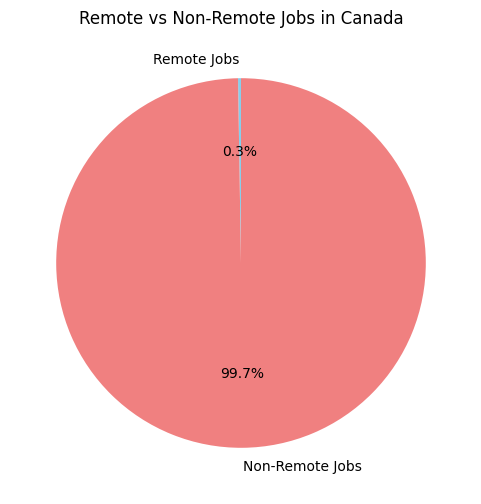

In [87]:
import matplotlib.pyplot as plt

# Choose top 5 countries by total jobs
top_countries = country_total.head(5).index

for country in top_countries:
    data = country_remote_df.loc[country]
    plt.figure(figsize=(6,6))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    plt.title(f"Remote vs Non-Remote Jobs in {country}")
    plt.show()


In [88]:
# save
monthly_remote.to_csv("monthly_remote_job_summary.csv", index=False)
print("Dashboard-ready CSV saved as 'monthly_remote_job_summary.csv'")


Dashboard-ready CSV saved as 'monthly_remote_job_summary.csv'


# Task 8: Predict future job market trends 
 

In [89]:
# Check which column has the job posting date
print(df[['job_date', 'year_month', 'month_year']].head())

# Use 'job_date' for daily or 'year_month' for monthly aggregation
df['job_date'] = pd.to_datetime(df['job_date'], errors='coerce')
df = df.dropna(subset=['job_date'])


                   job_date year_month month_year
0 2024-02-17 09:09:54+00:00    2024-02    2024-02
1 2024-02-17 09:09:17+00:00    2024-02    2024-02
2 2024-02-17 09:08:46+00:00    2024-02    2024-02
3 2024-02-17 09:08:08+00:00    2024-02    2024-02
4 2024-02-17 09:07:42+00:00    2024-02    2024-02


In [90]:
# aggregate month count
df['year_month'] = df['job_date'].dt.to_period('M')
monthly_jobs = df.groupby('year_month').size().reset_index(name='job_count')
monthly_jobs['year_month'] = monthly_jobs['year_month'].dt.to_timestamp()
monthly_jobs.set_index('year_month', inplace=True)
monthly_jobs.head()


,job_count
year_month,
2023-11-01,1
2023-12-01,10
2024-01-01,96
2024-02-01,101887
2024-03-01,142834


In [91]:
# predict feture job market analysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Lag features for last 3 months
for lag in range(1, 4):
    monthly_jobs[f'lag_{lag}'] = monthly_jobs['job_count'].shift(lag)
monthly_jobs.dropna(inplace=True)

X = monthly_jobs[['lag_1', 'lag_2', 'lag_3']]
y = monthly_jobs['job_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Forecast next 6 months
last_row = monthly_jobs[['lag_1', 'lag_2', 'lag_3']].iloc[-1].values.reshape(1, -1)
future_preds = []
for _ in range(6):
    pred = model.predict(last_row)[0]
    future_preds.append(pred)
    last_row = np.roll(last_row, shift=1)
    last_row[0,0] = pred

future_dates = pd.date_range(start=monthly_jobs.index[-1] + pd.offsets.MonthBegin(),
                             periods=6, freq='MS')
future_df = pd.DataFrame({'year_month': future_dates, 'predicted_jobs': future_preds})
future_df


,year_month,predicted_jobs
0,2024-04-01,101887.0
1,2024-05-01,101887.0
2,2024-06-01,101887.0
3,2024-07-01,101887.0
4,2024-08-01,101887.0
5,2024-09-01,101887.0


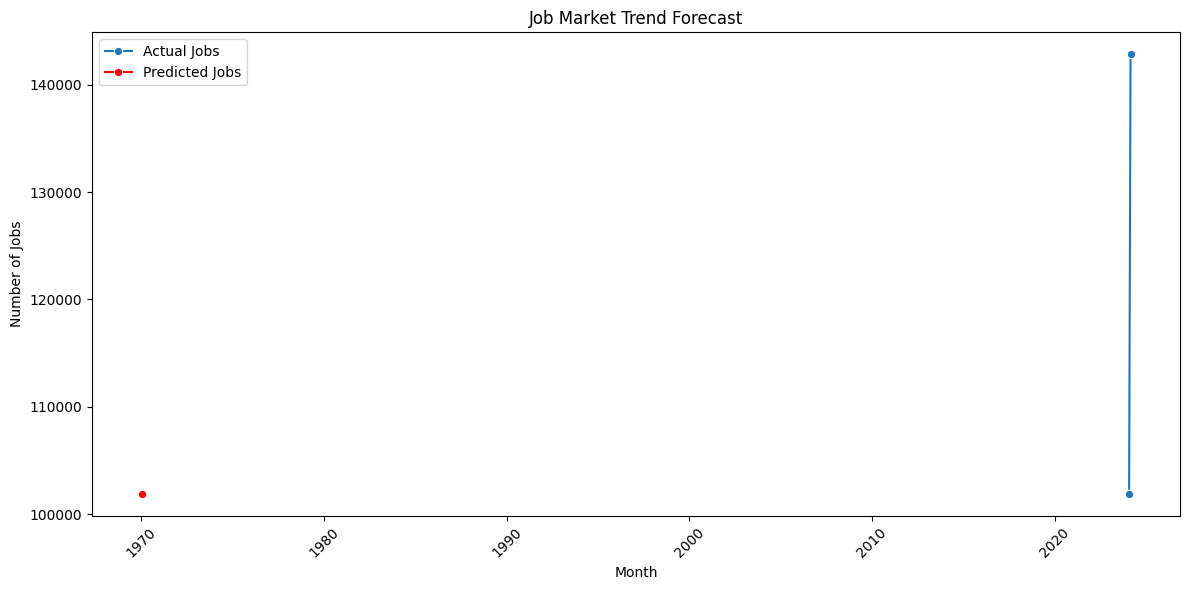

In [92]:
# -----------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_jobs, x=monthly_jobs.index, y='job_count', marker='o', label='Actual Jobs')
sns.lineplot(data=future_df, x=future_df.index, y='predicted_jobs', marker='o', label='Predicted Jobs', color='red')
plt.title('Job Market Trend Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [93]:
future_df.to_csv('future_job_forecast.csv')
print("Forecast CSV saved as 'future_job_forecast.csv'")

Forecast CSV saved as 'future_job_forecast.csv'


# NLP

In [94]:
# Example: monthly time series data
monthly = df.groupby(df['job_date'].dt.to_period('M')).agg(
    total_jobs=('processed_title', 'count'),
    remote_jobs=('remote', 'sum')
).reset_index()

monthly['year_month'] = monthly['job_date'].dt.to_timestamp()
monthly.set_index('year_month', inplace=True)


In [95]:
for lag in range(1, 4):
    monthly[f'total_jobs_lag_{lag}'] = monthly['total_jobs'].shift(lag)
    monthly[f'remote_jobs_lag_{lag}'] = monthly['remote_jobs'].shift(lag)

monthly.dropna(inplace=True)


In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = monthly[['total_jobs_lag_1','total_jobs_lag_2','total_jobs_lag_3',
             'remote_jobs_lag_1','remote_jobs_lag_2','remote_jobs_lag_3']]
y = monthly['total_jobs']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [97]:
last_row = X.iloc[-1].values.reshape(1, -1)
future_preds = []

for _ in range(6):
    pred = model.predict(last_row)[0]
    future_preds.append(pred)
    last_row = np.roll(last_row, shift=1)
    last_row[0,0] = pred
    last_row[0,3] = pred


In [98]:
future_dates = pd.date_range(start=monthly.index[-1] + pd.offsets.MonthBegin(),
                             periods=6, freq='MS')
forecast_df = pd.DataFrame({'year_month': future_dates, 'predicted_total_jobs': future_preds})
forecast_df.set_index('year_month', inplace=True)


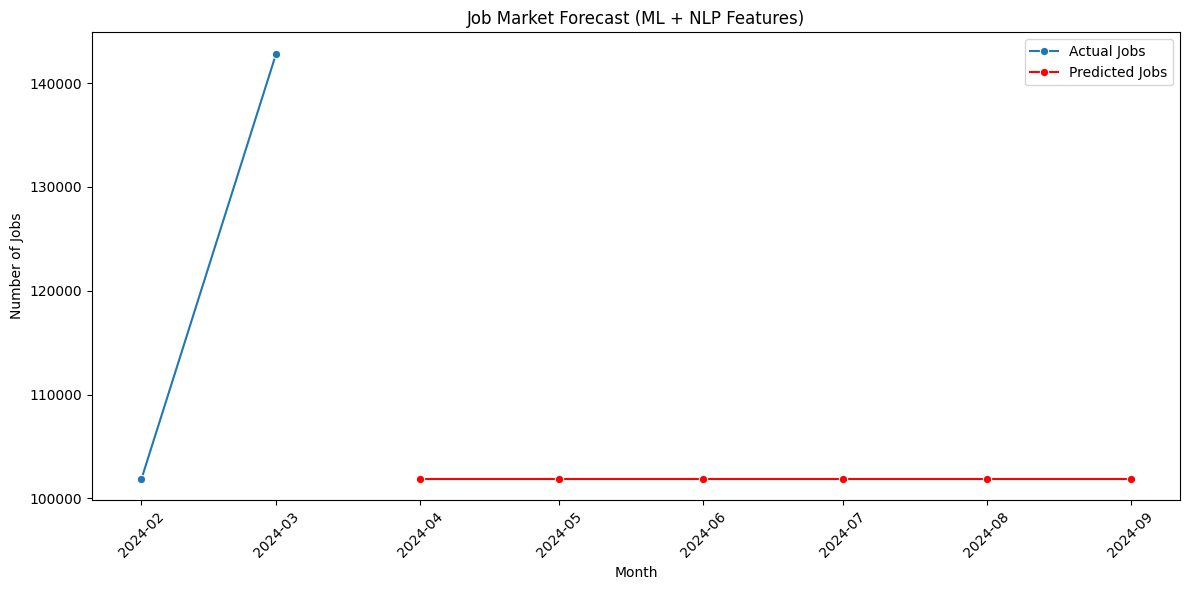

In [99]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x=monthly.index, y='total_jobs', marker='o', label='Actual Jobs')
sns.lineplot(data=forecast_df, x=forecast_df.index, y='predicted_total_jobs', marker='o', label='Predicted Jobs', color='red')
plt.title('Job Market Forecast (ML + NLP Features)')
plt.xlabel('Month')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [100]:
# CSV me save karna
forecast_df.to_csv("job_market_forecast.csv", index=False)
print("Forecast data saved to CSV successfully!")


Forecast data saved to CSV successfully!


In [101]:
output_path = "final_processed_jobs.csv"
df.to_csv(output_path, index=False)
print(f"✅ Final processed dataset saved at: {output_path}")


✅ Final processed dataset saved at: final_processed_jobs.csv
